Scratch notebook for Nextcaller programming challenge, attempting to implement a 3-class classifier with logistic regression.

In [32]:
from collections import OrderedDict
from itertools import cycle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from scipy import interp
import seaborn as sns
from sklearn import datasets
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc, log_loss
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import label_binarize
import time

%matplotlib notebook

In [2]:
data = pd.read_table('Search_Data.txt')

In [3]:
data.head()

,ID,Feat 1,Feat 2,Feat 3,Feat 4,Label
0,1,10.526413,5.680796,1.661569,0.167528,Burnt Umber
1,2,15.023991,5.471672,0.897001,0.669878,Red
2,3,16.021447,-1.501333,1.902509,0.351208,Red
3,4,14.425902,6.429031,1.025405,0.528408,Aquamarine
4,5,11.547150,-4.699529,0.337308,0.011619,Red


In [4]:
X = data[['Feat 1','Feat 2','Feat 3','Feat 4']]
Y = data['Label']
#Y[Y == 'Burnt Umber'] = 'Orange'

In [5]:
Y.value_counts(normalize = True)

Red            0.72
Aquamarine     0.22
Burnt Umber    0.06
Name: Label, dtype: float64

In [6]:
## scale data
standard_scaler = preprocessing.StandardScaler()
X_sc = standard_scaler.fit_transform(X)

In [7]:
X_sc.shape

(1000, 4)

In [8]:
logreg = linear_model.LogisticRegression()
logreg.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [ ]:
Y

In [ ]:
Y_bin = label_binarize(Y, ['Red','Aquamarine','Burnt Umber'])


In [ ]:
print(Y_bin)

In [ ]:
# Binarize the output
Y_bin = label_binarize(Y, classes=['Red', 'Aquamarine', 'Burnt Umber'])
X_train, X_test, y_train, y_test = train_test_split(X, Y_bin, test_size=0.3, random_state=0)
n_classes = Y_bin.shape[1]

In [ ]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(linear_model.LogisticRegression(C = 1e-6))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
classifier_2 = OneVsRestClassifier(linear_model.LogisticRegression(C = 1))
y_score_2 = classifier_2.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr_2 = dict()
tpr_2 = dict()
roc_auc_2 = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    fpr_2[i], tpr_2[i], _ = roc_curve(y_test[:, i], y_score_2[:, i])
    roc_auc_2[i] = auc(fpr_2[i], tpr_2[i])
    

In [ ]:
# Plot all ROC curves
fig, ax = plt.subplots(2,1, figsize=(9,12))
lw = 2

plt.axes(ax[0])
colors = cycle(['red', 'aqua', 'orange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics for each class (C = 1e-6)')
plt.legend(loc="lower right")
plt.show()

plt.axes(ax[1])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_2[i], tpr_2[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc_2[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics for each class (C = 1)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(classifier.coef_)
print(classifier_2.coef_)

In [ ]:
probs_1 = classifier.predict_proba(X_test)
probs_2 = classifier_2.predict_proba(X_test)

In [ ]:
print(probs_1[:20])
print(probs_2[:20])

In [ ]:
preds_1 = classifier.predict(X_test)
preds_2 = classifier_2.predict(X_test)
print(preds_1)
print(preds_2)

In [ ]:
h = .02

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_sc[:,0].min() - .5, X_sc[:,0].max() + .5
y_min, y_max = X_sc[:,1].min() - .5, X_sc[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
zero_param = np.zeros(xx.shape)
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel(), zero_param.ravel(), zero_param.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
#plt.pcolormesh(xx, yy, Z)



Let's try to visualize the data pair by pair to see if any relations jump out

In [ ]:
## create one big figure behind subpanels
fig, axes = plt.subplots(3,2,figsize=(9,12), facecolor='w')
pairs = [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]


## cycle through each numeric variable and logistic regress with cancellation (excluding cancellation itself)
for ax, pair in zip(axes.reshape(-1),pairs):
    
    # Plot also the training points
    ax.scatter(X_sc[:, pair[0]], X_sc[:, pair[1]], c=Y, edgecolors='k', cmap=plt.cm.Paired)
    #plt.xlabel('Sepal length')
    #plt.ylabel('Sepal width')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.show()

Something weird clearly going on with variable 4 - otherwise, hard to really see too much.

Let's investigate further.

In [ ]:
len(pairs)

In [ ]:
[val for val in pairs for __ in range(3)]


In [ ]:
fig, axes = plt.subplots(6,3,figsize=(9,12), facecolor='w')

## create one big figure behind subpanels
pairs_list = [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]
pairs = [val for val in pairs_list for __ in range(3)]

df_red = data[data['Label'] == 'Red']
df_aqua = data[data['Label'] == 'Aquamarine']
df_umber = data[data['Label'] == 'Orange']

dflist = [df_red, df_aqua, df_umber]
dfindices = [0,1,2]*6

## cycle through each numeric variable and logistic regress with cancellation (excluding cancellation itself)
for ax, pair, index in zip(axes.reshape(-1),pairs,dfindices):

    ## scale data
    X_color = dflist[index][['Feat 1','Feat 2','Feat 3','Feat 4']]
    standard_scaler = preprocessing.StandardScaler()
    X_color_sc = standard_scaler.fit_transform(X_color)

    ax.scatter(X_color_sc[:, pair[0]], X_color_sc[:, pair[1]], c=dflist[index]['Label'], edgecolors='k', cmap=plt.cm.Paired)
    #plt.xlabel('Sepal length')
    #plt.ylabel('Sepal width')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.show()

Let's see if anything stands out looking at point density with jointplot, as opposed to plotting individual points.

In [ ]:
feats = [['Feat 1','Feat 2'],['Feat 3','Feat 4']]*3
print(feats)

In [ ]:
feats = [['Feat 1','Feat 2'],['Feat 3','Feat 4']]*3
df_red = data[data['Label'] == 'Red']
df_aqua = data[data['Label'] == 'Aquamarine']
df_umber = data[data['Label'] == 'Orange']
df_colors = [df_red,df_red,df_aqua,df_aqua,df_umber,df_umber]
colors = ['Red','Red','Aquamarine','Aquamarine','Umber','Umber']
xmin = [data['Feat 1'].min(),data['Feat 2'].min(),data['Feat 3'].min(),data['Feat 4'].min()]
xmax = [data['Feat 1'].max(),data['Feat 2'].max(),data['Feat 3'].max(),data['Feat 4'].max()]
xmin_plot = [xmin[0],xmin[2]]*3
ymin_plot = [xmin[1],xmin[3]]*3
xmax_plot = [xmax[0],xmax[2]]*3
ymax_plot = [xmax[1],xmax[3]]*3

## cycle through each numeric variable and logistic regress with cancellation (excluding cancellation itself)
for i in range(6):
    sns.jointplot(x=feats[i][0], y=feats[i][1], data=df_colors[i], kind = 'hex', \
                  gridsize = [17,11], xlim=[xmin_plot[i],xmax_plot[i]], ylim = [ymin_plot[i],ymax_plot[i]])
    plt.title(colors[i])

In [ ]:
feats = [['Feat 1','Feat 3'],['Feat 2','Feat 4']]*3
df_red = data[data['Label'] == 'Red']
df_aqua = data[data['Label'] == 'Aquamarine']
df_umber = data[data['Label'] == 'Orange']
df_colors = [df_red,df_red,df_aqua,df_aqua,df_umber,df_umber]
colors = ['Red','Red','Aquamarine','Aquamarine','Umber','Umber']
xmin = [data['Feat 1'].min(),data['Feat 3'].min(),data['Feat 2'].min(),data['Feat 4'].min()]
xmax = [data['Feat 1'].max(),data['Feat 3'].max(),data['Feat 2'].max(),data['Feat 4'].max()]
xmin_plot = [xmin[0],xmin[2]]*3
ymin_plot = [xmin[1],xmin[3]]*3
xmax_plot = [xmax[0],xmax[2]]*3
ymax_plot = [xmax[1],xmax[3]]*3

## cycle through each numeric variable and logistic regress with cancellation (excluding cancellation itself)
for i in range(6):
    sns.jointplot(x=feats[i][0], y=feats[i][1], data=df_colors[i], kind = 'hex', \
                  gridsize = [17,11], xlim=[xmin_plot[i],xmax_plot[i]], ylim = [ymin_plot[i],ymax_plot[i]])
    plt.title(colors[i])

In [ ]:
feats = [['Feat 1','Feat 4'],['Feat 2','Feat 3']]*3
df_red = data[data['Label'] == 'Red']
df_aqua = data[data['Label'] == 'Aquamarine']
df_umber = data[data['Label'] == 'Orange']
df_colors = [df_red,df_red,df_aqua,df_aqua,df_umber,df_umber]
colors = ['Red','Red','Aquamarine','Aquamarine','Umber','Umber']
xmin = [data['Feat 1'].min(),data['Feat 4'].min(),data['Feat 2'].min(),data['Feat 3'].min()]
xmax = [data['Feat 1'].max(),data['Feat 4'].max(),data['Feat 2'].max(),data['Feat 3'].max()]
xmin_plot = [xmin[0],xmin[2]]*3
ymin_plot = [xmin[1],xmin[3]]*3
xmax_plot = [xmax[0],xmax[2]]*3
ymax_plot = [xmax[1],xmax[3]]*3

## cycle through each numeric variable and logistic regress with cancellation (excluding cancellation itself)
for i in range(6):
    sns.jointplot(x=feats[i][0], y=feats[i][1], data=df_colors[i], kind = 'hex', \
                  gridsize = [17,11], xlim=[xmin_plot[i],xmax_plot[i]], ylim = [ymin_plot[i],ymax_plot[i]])
    plt.title(colors[i])

Honestly, I really don't see much of anything in the above so far.

In [ ]:
data.groupby('Label').mean()

In [ ]:
data.groupby('Label').std()

In [ ]:
data.groupby('Label').describe()

The only thing I can see fro mthis that is plausible is a positive shift in the mean of Feature 2 for Burnt Umber, and maybe a slight decrease in Feature 4. Subtle if it exists.

Let's throw a k-nearest neighbors solution at this problem before trying random forest and logistic regression.

In [ ]:
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

In [ ]:
knnfit.kneighbors[500]

In [ ]:
print(pred)

K-nearest neighbors looks like it does basically nothing!

Let's try running some of these tests on the iris sample set to make sure that we're generally doing things right.

In [ ]:
iris = datasets.load_iris()
X_iris = iris.data  # we only take the first two features.
Y_iris = iris.target


In [ ]:
X_iris_train, X_iris_test, Y_iris_train, Y_iris_test = \
train_test_split(X_iris, Y_iris, test_size=0.3, random_state=0)

In [ ]:
knn = make_pipeline(preprocessing.StandardScaler(),KNeighborsClassifier(n_neighbors = 4, weights = 'distance'))

In [ ]:
knn.fit(X_iris_train,Y_iris_train)

In [ ]:
knn.score(X_iris_test,Y_iris_test)

Clearly, not just a function of me not knowing how to use knn - genuinely just does not work well for this data set.

Let's try running a PCA on the data and see what turns up (and also whether any of the modes are statistically significant).

In [ ]:
PCA_pipe = make_pipeline(preprocessing.StandardScaler(),PCA())

In [ ]:
X_reduced = PCA_pipe.fit_transform(X)

In [ ]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
#X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Paired)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()


In [ ]:
print(PCA_pipe.named_steps['pca'].explained_variance_ratio_)

PCA really looks random - no mode stands out for percentage of variance.

In [ ]:
df_red = data[data['Label'] == 'Red']
df_aqua = data[data['Label'] == 'Aquamarine']
df_umber = data[data['Label'] == 'Orange']

In [ ]:
print(df_red)

In [ ]:
PCA_pipe = make_pipeline(preprocessing.StandardScaler(),PCA())
X_reduced = PCA_pipe.fit_transform(df_umber[['Feat 1','Feat 2','Feat 3','Feat 4']])

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
#X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Paired)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()
print(PCA_pipe.named_steps['pca'].explained_variance_ratio_)

In [ ]:
PCA_pipe.named_steps['pca'].components_[0]

In [ ]:
fig, ax = plt.subplots()
#X_reduced = PCA(n_components=3).fit_transform(iris.data)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=df_umber['Label'], cmap=plt.cm.Paired)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")

In [ ]:
print(df_umber)

Some evidence that the Burnt Umber points feature a distinct mode of variation, but no real evidence that it is statistically significant.

In [ ]:
X_train

In [18]:
clf = RandomForestClassifier(n_estimators = 5000)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
clf_probs = clf.predict_proba(X_test)
score = log_loss(y_test, clf_probs)
clf_preds = clf.predict(X_test)

In [20]:
print(score)

0.799939729076


In [21]:
df_test = pd.DataFrame(X_test)
df_test['Label'] = (y_test)
df_test['Predictions'] = clf_preds

In [22]:
df_test

,Feat 1,Feat 2,Feat 3,Feat 4,Label,Predictions
993,13.880797,3.483438,1.164332,0.130333,Red,Red
859,13.094320,-4.161211,-0.795619,0.723872,Red,Red
298,17.943666,-0.314649,-0.944411,0.212692,Red,Red
553,14.238886,1.295045,1.409333,0.497747,Aquamarine,Red
672,17.091396,-4.109413,0.466071,0.002455,Red,Red
971,17.459991,6.427604,-0.566152,0.021129,Burnt Umber,Red
27,16.025091,-3.235010,1.359534,0.520263,Red,Red
231,15.758737,-3.396697,0.429979,0.011858,Red,Red
306,16.937479,-0.967477,1.271731,0.383209,Aquamarine,Red
706,17.153762,1.576691,1.213595,0.576801,Aquamarine,Red


In [23]:
df_test['Predictions'].value_counts()

Red            291
Aquamarine       8
Burnt Umber      1
Name: Predictions, dtype: int64

In [29]:
sample_leaf_options = [1,5,10,50,100,200,500]

for leaf_size in sample_leaf_options:
    model = RandomForestClassifier(n_estimators = 200, oob_score = True, n_jobs = -1,random_state =50,\
                                  max_features = "auto", min_samples_leaf = leaf_size)
    model.fit(X_train, y_train)
    print("AUC - ROC : ", roc_auc_score(Xtest,model.oob_prediction_))

AttributeError: 'RandomForestClassifier' object has no attribute 'oob_prediction_'

//anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
//anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:408: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
//anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
//anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:408: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


<IPython.core.display.Javascript object>


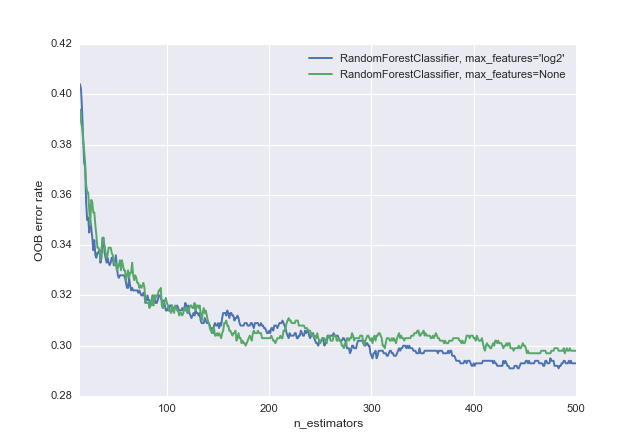

In [37]:
RANDOM_STATE = 42

ensemble_clfs = [
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 500

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, Y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()